In [4]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [5]:
## import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
data=pd.read_csv('archive.zip')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data.shape

(10000, 14)

In [10]:
data.isna().sum().sort_values(ascending=False)

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [12]:
X=data.iloc[:,3:13]
y=data.iloc[:,13]

In [13]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [17]:
#Feature Engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [19]:
#concatenate these variables
X=X.drop(['Geography','Gender'],axis=1)

In [20]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [22]:
X=pd.concat([X,geography,gender],axis=1)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [26]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [27]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [28]:
X_train.shape

(8000, 11)

In [30]:
#ANN--- Artificial Neural Network --- Tensorflow,pytorch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [31]:
classifier=Sequential()

In [32]:
#adding input layer
classifier.add(Dense(units=11,activation='relu'))

In [33]:
# adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [34]:
#adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [35]:
#Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [37]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [38]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
## Early stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
monitor='val_loss',
min_delta=0.0001,
patience=20,
verbose=1,
mode='auto',
baseline=None,
restore_best_weights=False
)

In [42]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8639 - loss: 0.3265 - val_accuracy: 0.8489 - val_loss: 0.3675
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8647 - loss: 0.3217 - val_accuracy: 0.8542 - val_loss: 0.3736
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8586 - loss: 0.3317 - val_accuracy: 0.8584 - val_loss: 0.3642
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8640 - loss: 0.3194 - val_accuracy: 0.8485 - val_loss: 0.3679
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8615 - loss: 0.3259 - val_accuracy: 0.8554 - val_loss: 0.3693
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8638 - loss: 0.3182 - val_accuracy: 0.8463 - val_loss: 0.3645
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8649 - loss: 0.3220 - val_accuracy: 0.8535 - val_loss: 0.3652
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8681 - loss: 0.3130 - 

In [44]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

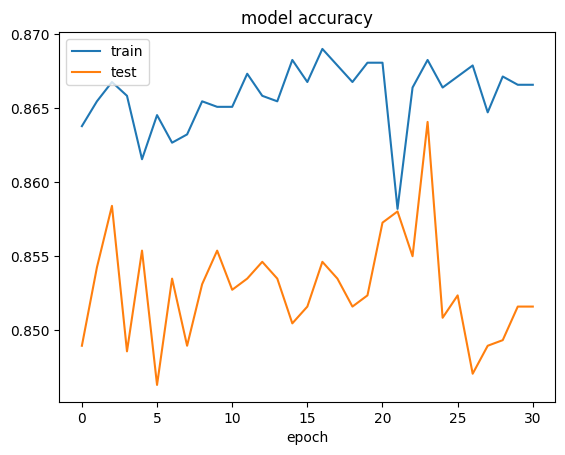

In [45]:
#summarize history for accuracy
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

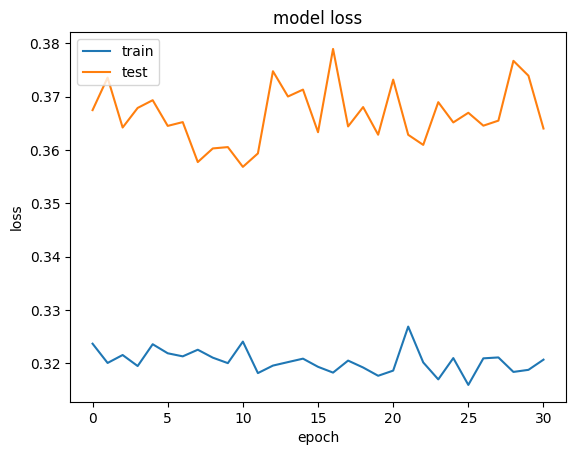

In [46]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [47]:
#Predict the test data
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [48]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1550,   45],
       [ 222,  183]])

In [49]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8665

In [50]:
# get the weights
classifier.get_weights()

[array([[ 0.3816961 , -2.022005  ,  0.41469195, -0.8199844 , -0.599691  ,
          2.498718  , -0.8750399 , -1.8295021 ,  1.3164573 , -0.3352391 ,
         -1.1945051 ],
        [ 1.445368  , -2.5666263 ,  1.5377138 , -3.8189623 ,  3.307535  ,
         -2.4533553 ,  5.2882886 , -2.3502977 , -3.0778055 ,  0.5720475 ,
          0.30186927],
        [-0.4901272 ,  0.25943726,  0.8402464 , -1.5873106 ,  0.678825  ,
          0.40461078, -1.0534803 , -0.7907957 ,  1.8053509 , -0.14321415,
          0.45775744],
        [ 1.3932799 , -1.4302511 , -2.456056  , -1.3648778 , -1.445793  ,
         -1.6202005 , -0.6180902 , -1.9501448 , -3.8478262 ,  0.74412745,
         -4.052799  ],
        [ 0.6973542 ,  0.4150852 , -3.4954593 ,  1.5252753 ,  0.88333064,
         -0.18388525, -1.7701952 , -0.24978264, -0.5722837 ,  4.1929107 ,
         -4.6735206 ],
        [-0.16956967, -0.68481976,  0.4827126 ,  1.2841356 ,  0.6990021 ,
          2.2660983 , -0.6733266 , -0.07092631, -1.9056798 ,  0.0171563